# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi news. 

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Please enter your name below:
# Name: Ilia Hashemi Rad
# Student Number: 99102456

# Section 1: Dataset prepartition
This section you need to download [dataset](https://drive.google.com/file/d/1bRxHQDzPr6wDimbM7b89H47kH8O3YV8Y/view?usp=sharing) in a directory you work. After that run the below cell to untar the datase.

**Note 1: Don't change the below command.**

**Note 2: If you use Windows OS, unzip the dataset manually.**

## Install Pypark & Initialization
Uncomment this section if you use google colab or local pc

In [1]:
#! pip install pyspark

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[*]") \
    .getOrCreate()

sc=spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/06 12:32:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/02/06 12:32:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Reading the data

In [5]:
import json

news_rdd = sc.textFile("news_data.jsonl")

# Parse JSON strings to Python dictionaries
news_json = news_rdd.map(json.loads)
del news_rdd

# Applying reduceByKey() to remove duplicates by 'uid'
dedup_rdd = news_json.map(lambda x: (x['uid'], x)).reduceByKey(lambda x, y: x).map(lambda x: x[1])
del news_json
dedup_rdd.take(1) # Show the first 5 elements of the deduplicated RDD

[{'body': 'پایگاه اطلاع رسانی دفتر مقام معظم رهبری : مراسم مشترک دانشآموختگی دانشجویان نیروهای مسلح با حضور فرمانده کل قوا برگزار شد.\n\nمراسم مشترک دانشآموختگی دانشجویان دانشگاههای افسری نیروهای مسلح صبح امروز (سهشنبه) با حضور حضرت آیتالله خامنهای فرمانده معظم کل قوا در دانشگاه امام علی(علیهالسلام) برگزار شد.\n\nمشروح خبر و تصاویر تکمیلی متعاقباً منتشر میشود.',
  'image_title_url': 'https://cdn.donya-e-eqtesad.com/thumbnail/Y7uQjkb1l3WU/QHn8O9nsSzT8qCU7RegsN6Pbb5v74eEtbKeSOh05RaZ4WjlowgHONkt7TZyzEhnm/yDtY1ht4U6UN.jpg',
  'language': 'fa',
  'source': 'روزنامه دنیای اقتصاد',
  'title': 'حضور رهبر انقلاب در مراسم مشترک دانش\u200cآموختگی دانشجویان نیروهای مسلح',
  'date_published': 1696910727,
  'uid': '1578b7b6918d302d3f69731f2',
  'url': 'https://donya-e-eqtesad.com/بخش-%D8%B3%D8%A7%DB%8C%D8%AA-%D8%AE%D9%88%D8%A7%D9%86-62/4009393-%D8%AD%D8%B6%D9%88%D8%B1-%D8%B1%D9%87%D8%A8%D8%B1-%D8%A7%D9%86%D9%82%D9%84%D8%A7%D8%A8-%D8%AF%D8%B1-%D9%85%D8%B1%D8%A7%D8%B3%D9%85-%D9%85%D8%B4%D8%AA%D8%B1%DA

In [24]:
import time
from collections import Counter

# Function to extract the most frequent entity name from 'ner_tags'
def get_most_frequent_entity(ner_tags):
    entities = [tag['entity'] for tag in ner_tags]
    if entities:
        return Counter(entities).most_common(1)[0][0]
    else:
        return None

# Convert Unix timestamp to human-readable date and get the most frequent entity per day
entity_per_day_rdd = dedup_rdd.filter(lambda x: x.get('ner_tags') and x.get('ner_tags') != None) \
                             .map(lambda news: (time.strftime('%Y-%m-%d', time.localtime(int(news['date_published']))),
                                               get_most_frequent_entity(news['ner_tags'])))

# Filter out entries with no entity information
entity_per_day_rdd = entity_per_day_rdd.filter(lambda x: x[1] is not None)

# Group by date and collect most frequent entity for each day
grouped_entities_per_day = entity_per_day_rdd.groupByKey().mapValues(lambda entities: Counter(entities).most_common(1)[0][0])

# Collect the data and sort by date
sorted_entities_per_day = sorted(grouped_entities_per_day.collect(), key=lambda x: x[0])

# Extract the most frequent entity for each day
most_frequent_entities = [entity for date, entity in sorted_entities_per_day]

# Print the list of most frequent entities sorted by date
print(len(most_frequent_entities))


62


In [27]:
print(sorted_entities_per_day)

[('2023-09-06', 'ایران'), ('2023-09-07', 'ایران'), ('2023-09-08', 'ایران'), ('2023-09-09', 'ایران'), ('2023-09-10', 'ایران'), ('2023-09-11', 'ایران'), ('2023-09-12', 'ایران'), ('2023-09-13', 'ایران'), ('2023-09-14', 'ایران'), ('2023-09-15', 'ایران'), ('2023-09-16', 'ایران'), ('2023-09-17', 'ایران'), ('2023-09-18', 'ایران'), ('2023-09-19', 'ایران'), ('2023-09-20', 'ایران'), ('2023-09-21', 'ایران'), ('2023-09-22', 'ایران'), ('2023-09-23', 'ایران'), ('2023-09-24', 'ایران'), ('2023-09-25', 'ایران'), ('2023-09-26', 'ایران'), ('2023-09-27', 'ایران'), ('2023-09-28', 'ایران'), ('2023-09-29', 'ایران'), ('2023-09-30', 'ایران'), ('2023-10-01', 'ایران'), ('2023-10-02', 'ایران'), ('2023-10-03', 'ایران'), ('2023-10-04', 'ایران'), ('2023-10-05', 'ایران'), ('2023-10-06', 'ایران'), ('2023-10-07', 'ایران'), ('2023-10-08', 'ایران'), ('2023-10-09', 'ایران'), ('2023-10-10', 'ایران'), ('2023-10-11', 'غزه'), ('2023-10-12', 'ایران'), ('2023-10-13', 'غزه'), ('2023-10-14', 'غزه'), ('2023-10-15', 'غزه'), ('2023-

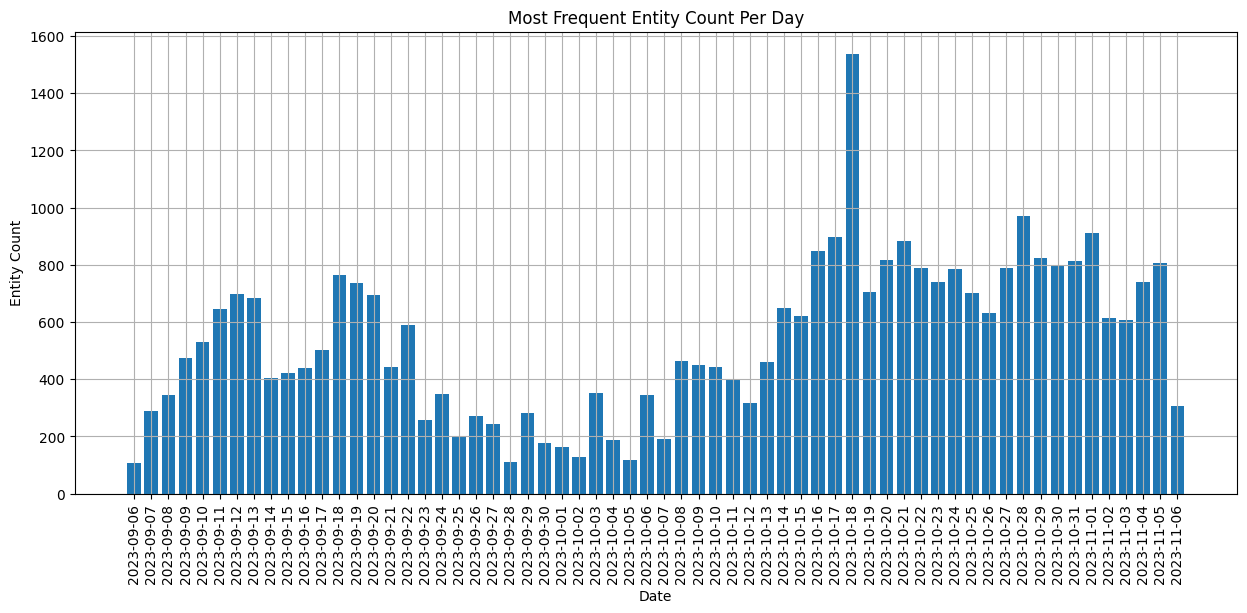

In [29]:
import time
from collections import Counter
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import matplotlib.pyplot as plt

# Function to extract the most frequent entity name from 'ner_tags'
def get_most_frequent_entity(ner_tags):
    entities = [tag['entity'] for tag in ner_tags]
    if entities:
        return Counter(entities).most_common(1)[0][0]
    else:
        return None

# Convert Unix timestamp to human-readable date and get the most frequent entity per day
entity_per_day_rdd = dedup_rdd.filter(lambda x: x.get('ner_tags') and x.get('ner_tags') != None).map(lambda news: (time.strftime('%Y-%m-%d', time.localtime(int(news['date_published']))),
                                               get_most_frequent_entity(news['ner_tags'])))

# Filter out entries with no entity information
entity_per_day_rdd = entity_per_day_rdd.filter(lambda x: x[1] is not None)

# Count occurrences of each entity per day
entity_counts_per_day_rdd = entity_per_day_rdd.map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)

# Aggregate counts for the same date
entity_counts_per_day_rdd = entity_counts_per_day_rdd.map(lambda x: (x[0][0], x[1]))

# Collect the data and sort by date
entity_counts_per_day = sorted(entity_counts_per_day_rdd.collect())

# Plot the bar chart with entity names on top of each bar
dates, entity_counts = zip(*entity_counts_per_day)
plt.figure(figsize=(15,6))
bars = plt.bar(dates, entity_counts)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Entity Count')
plt.title('Most Frequent Entity Count Per Day')
plt.grid()
plt.show()

## Classification of News

In [4]:
categories = dedup_rdd.filter(lambda x: 'categories' in x and x['categories']).map(lambda x: x['categories'][0]).distinct().collect()

print(f"The unique categories are : {categories}")

The unique categories are : ['health', 'sports', 'religious', 'politics', 'science_and_technology', 'economy', 'culture', 'security', 'social', 'military']


In [3]:
import re

# Define a function to remove useless characters including '\n', '\u200c', and '\\n'
def remove_useless_characters(text):
    # Remove special characters, digits, and unwanted unicode characters
    text = re.sub(r'\\|\\n|\\u200c|\n|پایان پیام|عکس|[^آ-ی\s]', ' ', text)

    # Define a regular expression pattern that matches one or more spaces
    pattern = re.compile(r" +")
    # Apply the pattern to the text and replace the matches with a single space
    text = pattern.sub(" ", text)
    return text

# Define a list of Farsi stop words
def load_stop_words(file_paths):
    stop_words_set = set()
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            stop_words_set.update(file.read().splitlines())
    return stop_words_set


# Apply the function to the news_rdd
title_category_rdd = dedup_rdd.filter(lambda x: 'categories' in x and 'body' in x and x['categories']).map(lambda x: (x['body'], x['categories'][0]))

title_category_rdd = title_category_rdd.map(lambda x: (remove_useless_characters(x[0]), x[1]))

# List of paths to your stop words files
stop_words_files = ['verbal.txt', 'persian.txt', 'short.txt', 'chars.txt', 'nonverbal.txt']

# Load stop words from files
stop_words = load_stop_words(stop_words_files)

title_category_rdd = title_category_rdd.map(lambda x: (" ".join(filter(lambda w: w not in stop_words, x[0].split())), x[1]))

title_category_rdd.take(3)

[('پایگاه اطلاع رسانی دفتر مقام معظم رهبری مراسم مشترک دانشآموختگی دانشجویان نیروهای مسلح حضور فرمانده قوا برگزار مراسم مشترک دانشآموختگی دانشجویان دانشگاههای افسری نیروهای مسلح صبح سهشنبه حضور حضرت آیتالله خامنهای فرمانده معظم قوا دانشگاه امام علی علیهالسلام برگزار مشروح خبر تصاویر تکمیلی متعاقباً منتشر',
  'politics'),
 ('رضا درویش مدیرعامل باشگاه پرسپولیس ادعای عجیبی بازگشت یاسین سلمانی بازی مطرح رضا درویش مدیرعامل باشگاه پرسپولیس ادعای عجیبی بازگشت یاسین سلمانی بازی مطرح گزارش عرشه آنلاین مدیرعامل باشگاه پرسپولیس ادعای عجیبی خصوص اهدای کاپ سوپرجام باشگاه پیگیریها خلاف مسأله میدهد سازمان لیگ پایان دیدار پرسپولیس گلگهر سیرجان جام سوپرکاپ دلیل قهرمانی سرخپوشان لیگ برتر جام حذفی مراسم تیم اهدا پرسپولیسیها پنجمین کاپ سوپرجام ببرند حالی رضا درویش مدیرعامل باشگاه پرسپولیس شب برنامه تلویزیونی ادعای عجیبی برنامه تلویزیونی خط تلفنی سازمان لیگ میخواست جام تاکسی بفرستد دلیلی جشن میخواستیم روحیه تیم هواداران بدهیم مراسم برگزار پیگیریهای مشخص ادعای درویش صحت سازمان لیگ برگزاری مراسم برنامه سازما

In [4]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, StringIndexer

# Convert the RDD into a DataFrame
title_category_df = title_category_rdd.toDF(["title", "category"])

indexer = StringIndexer(inputCol="category", outputCol="label")

# Prepare the data
tokenizer = Tokenizer(inputCol="title", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=10000)
data = indexer.fit(title_category_df).transform(title_category_df)
# Apply the tokenizer transformer
data = tokenizer.transform(data)
data = hashingTF.transform(data)
# TF-IDF vectorization of articles
idf = IDF(inputCol="raw_features", outputCol="features")
idf_vectorizer = idf.fit(data)
data = idf_vectorizer.transform(data)

data.show()

data = data.select('features', 'label')

+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|               title|            category|label|               words|        raw_features|            features|
+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|پایگاه اطلاع رسان...|            politics|  2.0|[پایگاه, اطلاع, ر...|(10000,[902,1130,...|(10000,[902,1130,...|
|رضا درویش مدیرعام...|              sports|  3.0|[رضا, درویش, مدیر...|(10000,[96,275,28...|(10000,[96,275,28...|
|جنبش حماس خواهان ...|            politics|  2.0|[جنبش, حماس, خواه...|(10000,[77,96,110...|(10000,[77,96,110...|
|بازار سرمایه فعال...|             economy|  0.0|[بازار, سرمایه, ف...|(10000,[96,192,23...|(10000,[96,192,23...|
|گزارش ایسنا نماین...|            politics|  2.0|[گزارش, ایسنا, نم...|(10000,[96,156,22...|(10000,[96,156,22...|
|بلند شماره روایتی...|             culture|  4.0|[بلند, شماره, روا...|(10000,[46,69,96,...|(1000

In [5]:
del title_category_df
del title_category_rdd

In [6]:
(train, test) = data.randomSplit([0.75, 0.25], seed = 202)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 406923


Test Dataset Count: 135649


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(featuresCol='features',
                        labelCol='label',
                        family="multinomial",
                        regParam=0.3,
                        elasticNetParam=0,
                        maxIter=50)

lrModel = lr.fit(train)
del train

In [9]:
predictions = lrModel.transform(test)

del test

predictions.select('probability','prediction', 'label').show()

24/02/05 06:52:28 WARN DAGScheduler: Broadcasting large task binary with size 1047.9 KiB


+--------------------+----------+-----+
|         probability|prediction|label|
+--------------------+----------+-----+
|[0.43529226439635...|       0.0|  2.0|
|[0.10414441054242...|       1.0|  1.0|
|[0.21475233428591...|       1.0|  1.0|
|[0.31288095348502...|       1.0|  1.0|
|[0.27430103680319...|       1.0|  1.0|
|[0.44270762716058...|       0.0|  1.0|
|[0.43980579633832...|       1.0|  1.0|
|[0.87539365414969...|       0.0|  0.0|
|[0.47851554727533...|       0.0|  0.0|
|[0.44543264235116...|       0.0|  5.0|
|[0.19570421893707...|       1.0|  6.0|
|[2.35172757421602...|       3.0|  3.0|
|[1.76108522329332...|       2.0|  2.0|
|[0.49261500957815...|       0.0|  1.0|
|[0.16749559231725...|       2.0|  2.0|
|[0.94364771922404...|       0.0|  4.0|
|[0.22444749298890...|       1.0|  1.0|
|[0.26006443320589...|       1.0|  0.0|
|[0.62832667232219...|       0.0|  0.0|
|[0.12278664721630...|       2.0|  2.0|
+--------------------+----------+-----+
only showing top 20 rows



In [10]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
print("Test-set Accuracy is : ", evaluator.evaluate(predictions))

24/02/05 06:52:38 WARN DAGScheduler: Broadcasting large task binary with size 1056.0 KiB


Test-set Accuracy is :  0.6380619390892938
